In [38]:
import numpy as np
import pandas as pd
import warnings

In [39]:
warnings.filterwarnings('ignore')

GET THE DATASET

In [40]:
column_names=["User_id","item_id","Rating","Timestamp"]
df=pd.read_csv('u.data.txt',sep='\t',names=column_names)
print(df.head())

   User_id  item_id  Rating  Timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [41]:
df.shape

(100000, 4)

In [42]:
df['User_id'].nunique()

943

In [43]:
df['item_id'].nunique()

1682

In [44]:
dfo=pd.read_csv('u.item.txt', sep="\|",header = None,encoding = "ISO-8859-1")

In [45]:
dfo.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
dfo=dfo[[0,1]]
dfo.columns=['item_id','titles']
print(dfo.head())

   item_id             titles
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


In [47]:
dfg=pd.merge(df,dfo,on='item_id')
print(dfg.tail())

       User_id  item_id  Rating  Timestamp  \
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                  titles  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)  


Exploratory Data Analysis

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [49]:
print(dfg.groupby('titles').mean()['Rating'].sort_values(ascending=False).head())

titles
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: Rating, dtype: float64


In [50]:
dfg.groupby('titles').count()['Rating'].sort_values(ascending=False)

titles
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: Rating, Length: 1664, dtype: int64

In [51]:
ratings=pd.DataFrame(dfg.groupby('titles').mean()['Rating'])


In [52]:
print(ratings.head())

                             Rating
titles                             
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390


In [53]:
ratings['num of ratings']=pd.DataFrame(dfg.groupby('titles').count()['Rating'])

In [54]:
ratings

,Rating,num of ratings
titles,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [55]:
ratings.sort_values(by='Rating',ascending=False)

,Rating,num of ratings
titles,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


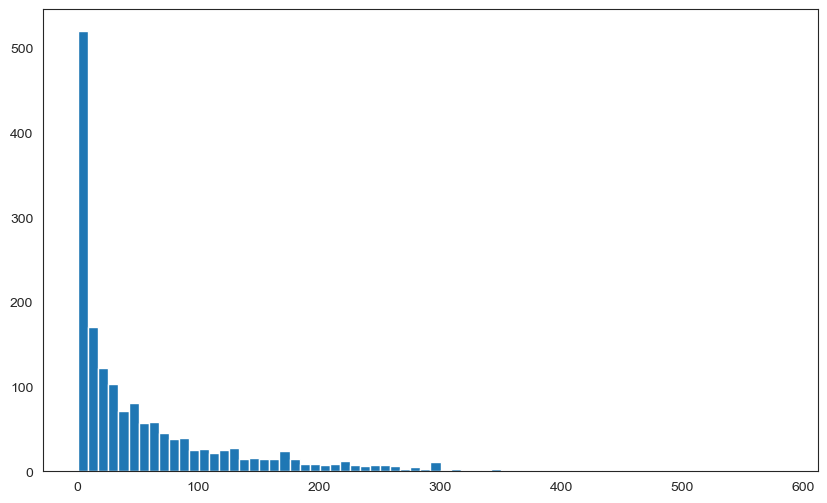

In [56]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'],bins=70)
plt.show()

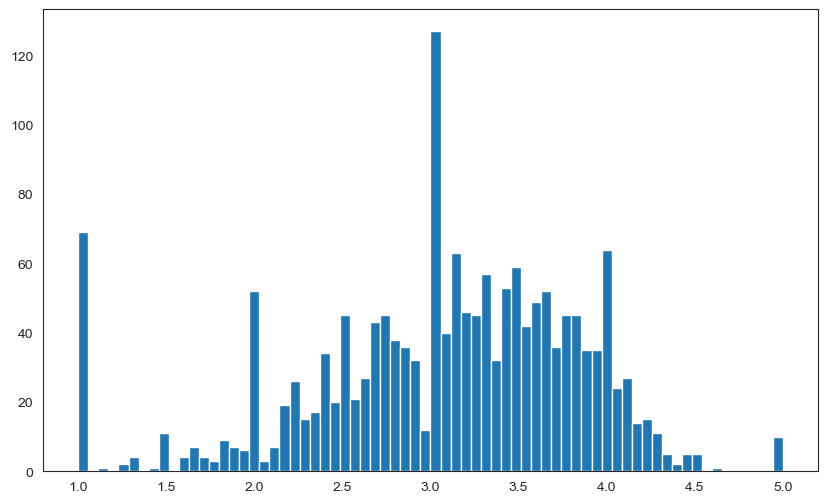

In [57]:
plt.figure(figsize=(10,6))
plt.hist(ratings['Rating'],bins=70)
plt.show()

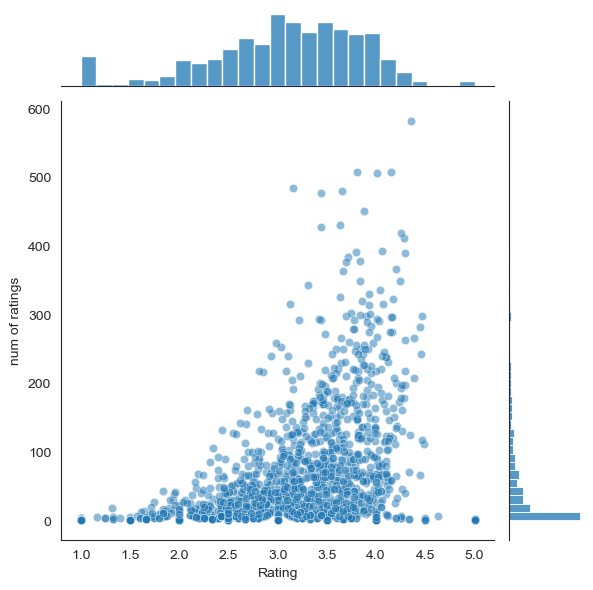

In [58]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

Creating Movie Recommendation

In [59]:
dfg.head()

,User_id,item_id,Rating,Timestamp,titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [60]:
moviemat= dfg.pivot_table(index='User_id',columns='titles',values='Rating')

In [61]:
moviemat.head()

titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [62]:
ratings.sort_values(by='num of ratings',ascending=False).head()

,Rating,num of ratings
titles,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [63]:
starwars_user_ratings=moviemat['Star Wars (1977)']
print(starwars_user_ratings.head())

User_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64


In [64]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [65]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
print(corr_starwars)

                                       Correlation
titles                                            
'Til There Was You (1997)                 0.872872
1-900 (1994)                             -0.645497
101 Dalmatians (1996)                     0.211132
12 Angry Men (1957)                       0.184289
187 (1997)                                0.027398
...                                            ...
Young Guns (1988)                         0.186377
Young Guns II (1990)                      0.228615
Young Poisoner's Handbook, The (1995)    -0.007374
Zeus and Roxanne (1997)                   0.818182
unknown                                   0.723123

[1410 rows x 1 columns]


In [66]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
titles,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [67]:
corr_starwars1=corr_starwars.join(ratings['num of ratings'])
corr_starwars1[corr_starwars1['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
titles,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


Predict Function

In [68]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
    return predictions

In [71]:
print("Enter The Name Of The Movie You Liked")
a=input()

Enter The Name Of The Movie You Liked


In [72]:
predictions=predict_movies(a)
print("THESE ARE SOME MOVIES YOU MIGHT ALSO LIKE!!")
predictions.head(10)

THESE ARE SOME MOVIES YOU MIGHT ALSO LIKE!!


,Correlation,num of ratings
titles,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
